In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score,median_absolute_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
df=pd.read_csv('C:/Users/beril/Downloads/EuropeanSales.csv')

In [4]:
df

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
0,Austria,8.4,49.60,4.2,5.8,112,941
1,Belgium,10.5,47.09,8.1,5.9,160,1682
2,Bulgaria,7.6,6.55,13.5,3.5,20,154
3,Czech Rep.,10.2,20.67,6.6,4.4,101,1029
4,Denmark,5.5,62.12,5.2,8.4,170,935
5,Finland,5.3,51.32,9.9,6.3,372,1971
6,France,61.9,44.51,10.0,5.7,96,5929
7,Germany,82.5,44.45,9.1,4.6,83,6824
8,Greece,11.2,31.67,9.9,3.9,73,813
9,Hungary,10.0,15.41,7.3,5.1,45,449


In [6]:
df.corr()

,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
Population,1.000000,-0.175236,0.321035,-0.292881,-0.298383,0.807971
GDPperHead,-0.175236,1.000000,-0.502419,0.589111,0.662254,0.151556
UnemploymentRate,0.321035,-0.502419,1.000000,-0.314309,-0.213605,0.171849
EducationSpending,-0.292881,0.589111,-0.314309,1.000000,0.612180,-0.052690
SalesPerCapita,-0.298383,0.662254,-0.213605,0.612180,1.000000,0.081418
ComputerSales,0.807971,0.151556,0.171849,-0.052690,0.081418,1.000000


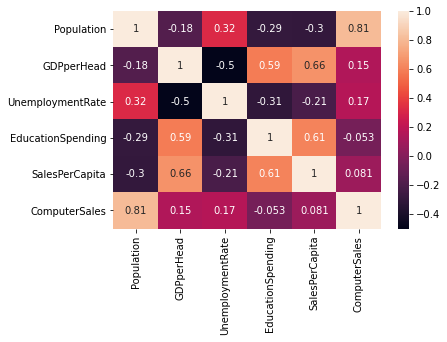

In [8]:
sns.heatmap(df.corr(), annot=True)

In [53]:
#Building a model with all variables, first for total sales
X= df[['Population', 'GDPperHead', 'UnemploymentRate', 'EducationSpending']].values
y=df['ComputerSales'].values


In [54]:
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction

array([1363.8820806 , 1644.88616336, -165.68201471,  328.04375333,
       1873.39885463, 1522.41137585, 5810.29898062, 7367.96794715,
       1021.6595562 ,  170.39567292, 1517.62265041, 5229.97696895,
       2126.5368222 , 2797.50370053,  541.19478105,  703.5738682 ,
       4170.17655694, 1873.54542687, 1753.62348984, 5278.8535032 ,
       5419.12986186])

In [55]:
lm.score(X,y)

0.7453340621475361

In [56]:
def adjusted_r2(R2, a):
    adj_r2 = 1- (1-R2)*(a.shape[0]-1)/(a.shape[0]-a.shape[1]-1)
    return adj_r2
    

In [57]:
adjusted_r2(lm.score(X,y), X)

0.6816675776844201

In [58]:
X

array([[ 8.4 , 49.6 ,  4.2 ,  5.8 ],
       [10.5 , 47.09,  8.1 ,  5.9 ],
       [ 7.6 ,  6.55, 13.5 ,  3.5 ],
       [10.2 , 20.67,  6.6 ,  4.4 ],
       [ 5.5 , 62.12,  5.2 ,  8.4 ],
       [ 5.3 , 51.32,  9.9 ,  6.3 ],
       [61.9 , 44.51, 10.  ,  5.7 ],
       [82.5 , 44.45,  9.1 ,  4.6 ],
       [11.2 , 31.67,  9.9 ,  3.9 ],
       [10.  , 15.41,  7.3 ,  5.1 ],
       [ 4.4 , 60.46,  6.3 ,  4.3 ],
       [58.9 , 38.49,  9.3 ,  5.  ],
       [16.5 , 52.96,  4.4 ,  5.  ],
       [38.  , 13.85, 14.4 ,  5.6 ],
       [10.7 , 22.92,  6.3 ,  5.9 ],
       [21.3 ,  9.3 ,  7.  ,  3.3 ],
       [44.8 , 35.22, 14.2 ,  4.4 ],
       [ 7.5 , 64.43,  3.6 ,  5.6 ],
       [ 9.2 , 51.95,  6.3 ,  7.6 ],
       [75.8 ,  9.94,  8.6 ,  3.7 ],
       [61.  , 43.54,  5.9 ,  4.8 ]])

In [59]:
# Not bad but i think we can do better, i will drop the variables one by one starting with unemployment rate
X = np.delete(X, 2, 1)
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)

0.6967160526248697

In [60]:
X

array([[ 8.4 , 49.6 ,  5.8 ],
       [10.5 , 47.09,  5.9 ],
       [ 7.6 ,  6.55,  3.5 ],
       [10.2 , 20.67,  4.4 ],
       [ 5.5 , 62.12,  8.4 ],
       [ 5.3 , 51.32,  6.3 ],
       [61.9 , 44.51,  5.7 ],
       [82.5 , 44.45,  4.6 ],
       [11.2 , 31.67,  3.9 ],
       [10.  , 15.41,  5.1 ],
       [ 4.4 , 60.46,  4.3 ],
       [58.9 , 38.49,  5.  ],
       [16.5 , 52.96,  5.  ],
       [38.  , 13.85,  5.6 ],
       [10.7 , 22.92,  5.9 ],
       [21.3 ,  9.3 ,  3.3 ],
       [44.8 , 35.22,  4.4 ],
       [ 7.5 , 64.43,  5.6 ],
       [ 9.2 , 51.95,  7.6 ],
       [75.8 ,  9.94,  3.7 ],
       [61.  , 43.54,  4.8 ]])

In [61]:
#Dropping educationspending
X = np.delete(X, 2, 1)
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)

0.7127460832075186

In [62]:
#Dropping GDP per Head
X = np.delete(X, 1, 1)
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)

0.6345445541055612

In [71]:
#Dropping GDP per Head did not bring good results, will try only GDP per Head
X=df['GDPperHead'].values
X=X.reshape(-1,1)
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)

-0.028453553695305445

In [78]:
#Very bad results, i think i did something wrong, i will try one more variable by multiplying GDPperHead with Population
X=df.GDPperHead*df.Population
X=np.array(X)
X=X.reshape(-1,1)
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)

0.7992805732728091

In [81]:
#Combining 2 variables by multiplying them gives us the best result, now trying to predict SalesperCapita, at first using all variables
X= df[['Population', 'GDPperHead', 'UnemploymentRate', 'EducationSpending']].values
y=df['SalesPerCapita'].values
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)

0.45492835248236485

In [82]:
#very low results, lets drop population first
X=np.delete(X, 0, 1)
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)


0.45308256988345574

In [83]:
#we got even lower results, i will keep population and drop other variables starting with education spending
X= df[['Population', 'GDPperHead', 'UnemploymentRate']].values
y=df['SalesPerCapita'].values
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)

0.4250280010245431

In [84]:
#Also lower results, lets try unemployment rate
X= df[['Population', 'GDPperHead', 'EducationSpending']].values
y=df['SalesPerCapita'].values
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)

0.4462064104388075

In [85]:
#Higher than last one but lower overall, lets try just population and GDPperHead
X= df[['Population', 'GDPperHead']].values
y=df['SalesPerCapita'].values
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)

0.41430925718807066

In [86]:
#Still lower, lets try only GDPperHead
X= df[['GDPperHead']].values
y=df['SalesPerCapita'].values
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)

0.40903143716400336

In [87]:
#Even lower, lets try all of them one by one
X= df[['Population']].values
y=df['SalesPerCapita'].values
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)

0.041087005841985325

In [88]:
#Very low, probably not going to use population
X= df[['EducationSpending']].values
y=df['SalesPerCapita'].values
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)

0.3418567298730031

In [89]:
#Not bad
X= df[['UnemploymentRate']].values
y=df['SalesPerCapita'].values
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)

-0.004602928588891997

In [91]:
#Very low, not going to use this as well
X= df[['EducationSpending', 'GDPperHead']].values
y=df['SalesPerCapita'].values
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)

0.4600950349250724

In [94]:
#Lets try feature engineering
df['EduPerCapita']=df['EducationSpending']/df['Population']
X= df[['EduPerCapita', 'GDPperHead']].values
y=df['SalesPerCapita'].values
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)

0.48407222557858665

In [95]:
#A little higher, lets try some more
df['EduPerGDP']=df['EducationSpending']/df['Population']
X= df[['EduPerGDP']].values
y=df['SalesPerCapita'].values
lm=LinearRegression()
lm.fit(X, y)
prediction=lm.predict(X)
prediction
lm.score(X,y)
adjusted_r2(lm.score(X,y), X)


0.3484074920093274

In [ ]:
#Overall we got the highest with EducationSpending/Population and GDPperHead, this one is harder to predict. 
#I did not use train_test_split or scaling as the data is very limited and they wont have much effect
